In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("C://Users//admin//Desktop//Placement_New//Dataset//Placement.csv")

In [20]:
df.head() # Top 5 records

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,Mkt&Fin,55.50,Placed


In [21]:
df = df.drop('sl_no' , axis = 1 ) # Dropping features which are not important

## Feature Engineering

Converting categorical features into 0's and 1's.

In [22]:
df.select_dtypes(include=['object']).columns # All columns having data type object

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [23]:
df['gender'] = df['gender'].replace("M" , 0)
df['gender'] = df['gender'].replace("F" , 1)

df['ssc_b'] = df['ssc_b'].replace("Others" , 0)
df['ssc_b'] = df['ssc_b'].replace("Central" , 1)

df['hsc_b'] = df['hsc_b'].replace("Others" , 0)
df['hsc_b'] = df['hsc_b'].replace("Central" , 1)

df['hsc_s'] = df['hsc_s'].replace("Arts" , 0)
df['hsc_s'] = df['hsc_s'].replace("Commerce" , 1)
df['hsc_s'] = df['hsc_s'].replace("Science" , 2)

df['degree_t'] = df['degree_t'].replace("Others" , 0)
df['degree_t'] = df['degree_t'].replace("Comm&Mgmt" , 1)
df['degree_t'] = df['degree_t'].replace("Sci&Tech" , 2)

df['workex'] = df['workex'].replace("No" , 0)
df['workex'] = df['workex'].replace("Yes" , 1)

df['specialisation'] = df['specialisation'].replace("Mkt&HR" , 0)
df['specialisation'] = df['specialisation'].replace("Mkt&Fin" , 1)

df['status'] = df['status'].replace("Not Placed" , 0)
df['status'] = df['status'].replace("Placed" , 1)

In [24]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,specialisation,mba_p,status
0,0,67.00,0,91.00,0,1,58.00,2,0,0,58.80,1
1,0,79.33,1,78.33,0,2,77.48,2,1,1,66.28,1
2,0,65.00,1,68.00,1,0,64.00,1,0,1,57.80,1
3,0,56.00,1,52.00,1,2,52.00,2,0,0,59.43,0
4,0,85.80,1,73.60,1,1,73.30,1,0,1,55.50,1


## Feature Selection

### Correlation Heatmap

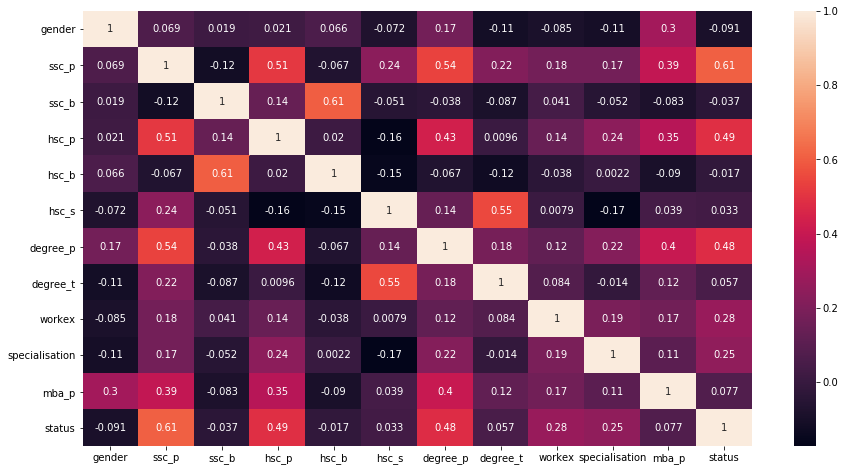

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr() , annot = True)

#### According to Correlation heatmap, students score in 10th , 12th and Degree plays a major role for getting placement.

### Feature importance using chi2

In [26]:
x = df.drop(['status'] , axis = 1)
y = df.status

In [13]:
from sklearn.feature_selection import SelectKBest , chi2

features = SelectKBest(score_func = chi2 ,  k = 10)

rank=features.fit(x,y)

dfscores = pd.DataFrame(rank.scores_ , columns=['scores'])

dfcolums = pd.DataFrame(x.columns)

final = pd.concat([dfscores , dfcolums] , axis = 1)

final.nlargest(13 , 'scores')

,scores,0
1,137.739258,ssc_p
3,92.449312,hsc_p
6,40.204896,degree_p
8,10.745484,workex
9,5.968658,specialisation
0,1.142736,gender
10,0.691857,mba_p
7,0.155104,degree_t
2,0.137712,ssc_b
5,0.058876,hsc_s


As per the observation only few features are important like ----

ssc_p

hsc_p

degree_p

workex

specialisation

gender

In [27]:
x = df[['ssc_p' , 'hsc_p' , 'degree_p' , 'workex' , 'specialisation' , 'gender']]
y = df.status

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
df = pd.DataFrame(x)
data = pd.concat([df , y] , axis = 1)

In [29]:
data.head()

,0,1,2,3,4,5,status
0,-0.028087,2.268812,-1.140102,-0.724446,-1.123903,-0.739434,1
1,1.113369,1.103448,1.513267,1.380364,0.889757,-0.739434,1
2,-0.213238,0.153313,-0.322843,-0.724446,0.889757,-0.739434,1
3,-1.046417,-1.318339,-1.957362,-0.724446,-1.123903,-0.739434,0
4,1.712332,0.668391,0.943909,-0.724446,0.889757,-0.739434,1


In [31]:
data.to_csv(r'C://Users//admin//Desktop//Placement_New//Data_Preprocessing//data.csv' , index = False)